In [3]:
from platform import python_version

print(python_version())

3.11.9


In [ ]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"


In [4]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.0.3
Grader version: 0.22.9


In [9]:
your_api_key = ""
from qiskit_ibm_runtime import QiskitRuntimeService

# CRN 없이 계정 저장
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=your_api_key,
    name="",
    overwrite=True
)

In [10]:
service = QiskitRuntimeService(name="서정근")
service.saved_accounts()

IBMNotAuthorizedError: '401 Client Error: Unauthorized for url: https://auth.quantum.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [11]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

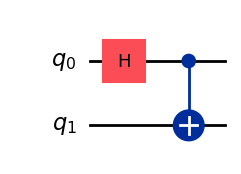

In [12]:
# 2-큐빗 회로를 만듭니다
qc = QuantumCircuit(2)
# 0번 큐빗에 H 게이트를 가합니다
qc.h(0)
# 0번 큐빗에서 1번 큐빗으로 CNOT 게이트를 가합니다
qc.cx(0, 1)
# MatPlotLib ("mpl")으로 회로를 그립니다
qc.draw("mpl")

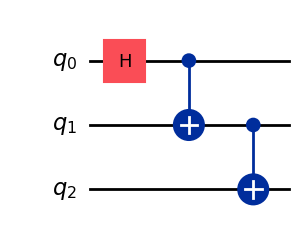

In [13]:
# 3-큐빗 회로를 만듭니다
qc = QuantumCircuit(3)

### 아래에 코드를 작성해주세요 ###
# 0번 큐빗에 H 게이트를 가하세요
qc.h(0)
# 0번 큐빗에서 1번 큐빗으로 CNOT 게이트를 가하세요
qc.cx(0,1)
# 1번 큐빗에서 2번 큐빗으로 CNOT 게이트를 가하세요
qc.cx(1,2)
### 코드 작성이 완료되었습니다 ###

# MatPlotLib ("mpl")으로 회로를 그립니다
qc.draw("mpl")

In [14]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


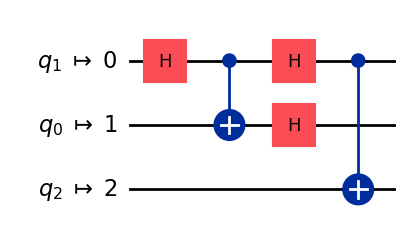

In [15]:
### 아래에 코드를 작성해주세요 ###
# 큐빗 0과 1, 0과 2가 연결되어 있음을 나타내는 coupling map을 다음과 같이 짝지어서 리스트로 작성해주세요: [[0,1],...]
coupling_map =[[0,1],[0,2]]

# `generate_preset_pass_manager` 함수와 coupling map을 이용해 패스매니저를 만들고 양자 회로 `qc`를 트랜스파일 해주세요
pm = generate_preset_pass_manager(coupling_map=coupling_map)
qc_transpiled =pm.run(qc)
### 코드 작성이 완료되었습니다 ###

qc_transpiled.draw("mpl")

In [16]:
# 아래의 함수를 실행해 답안을 제출해주세요
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [17]:
# 백엔드를 설정합니다
backend = AerSimulator()

# Sampler를 설정합니다
sampler = Sampler(mode=backend)

# Sampler로 회로를 실행합니다 (Sampler를 실행할 때에는 측정 부분을 꼭 포함해주세요)
pm = generate_preset_pass_manager(backend=backend)
job = sampler.run([pm.run(qc.measure_all(inplace=False))])

# 결과를 가져옵니다
results_sampler = job.result()

In [18]:
# Estimator를 설정합니다
estimator = Estimator(mode=backend)

# 관측가능량을 정의합니다
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Estimator로 회로를 실행합니다
pm = generate_preset_pass_manager(backend=backend)
pub = (pm.run(qc), observables)
job = estimator.run(pubs=[pub])

# 결과를 가져옵니다
results_estimator = job.result()

  Outcomes : {'000': 507, '111': 517}


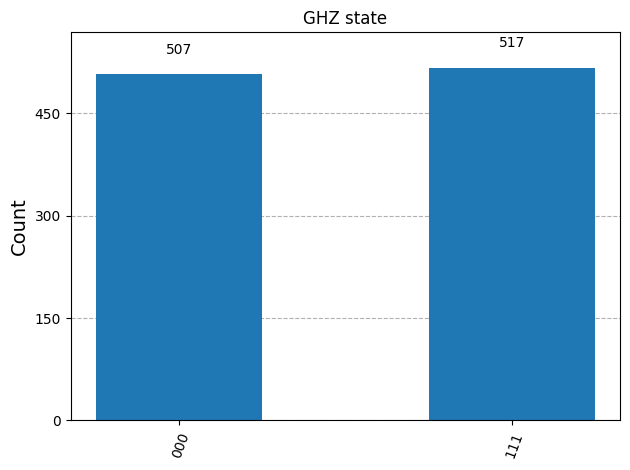

In [19]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(0.02783203125)), ('ZZX', np.float64(-0.0009765625)), ('ZII', np.float64(0.015625)), ('XXI', np.float64(-0.01220703125)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


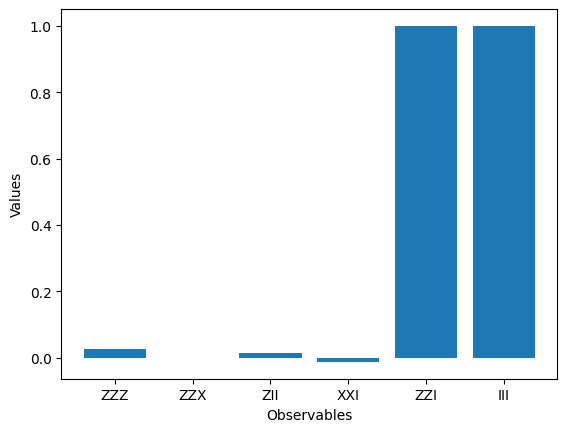

In [20]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# 그래프를 그립니다
container = plt.bar(observables_list, exp_values, width=0.8)
# x축과 y축 이름을 설정합니다
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()


In [21]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1220 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 229 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


In [ ]:
# 서비스를 불러와 IBM QPU에 접속합니다
service = QiskitRuntimeService(name="qgss-2025")

# 대기열이 가장 적은 백엔드를 불러옵니다
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

In [ ]:
### 아래에 코드를 작성해주세요 ###
# Step 1. 정의
# 위에서 `qc`라는 변수에 GHZ 회로를 할당하였던 것을 기억해보세요

# Step 2. 최적화
pm = 
qc_transpiled = 

In [ ]:
# Step 3. 실행
sampler = 
job = 

In [ ]:
# Step 4. 후처리
results = 
counts_list = 
### 코드 작성이 완료되었습니다 ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')